# 서프트 벡터 머신

In [0]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
X, y = iris.data, iris.target

In [0]:
X2 = X[:,:2]

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
y2 = y.copy()
y2[(y2==2)] = 1

In [0]:
from sklearn.model_selection import train_test_split
np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.7)

In [7]:
from sklearn.svm import SVC
svm_clf = SVC(kernel = "linear",C=float("inf"))
svm_clf.fit(X_train,y_train)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

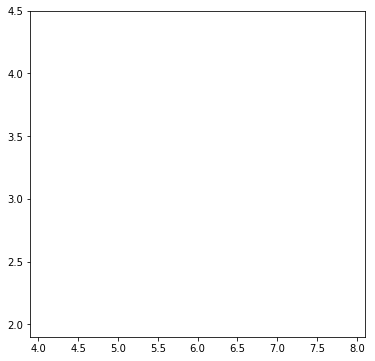

In [8]:
plt.figure(figsize=(6,6))
plt.xlim(3.9,8.1)
plt.ylim(1.9,4.5)

w = svm_clf.coef_[0]
v = svm_clf.intercept_[0]

XX = np.linspace(4,8,30)
decision_boundary = -w[0]/w[1] * XX - v/w[1]

In [0]:
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin


In [0]:
svs = svm_clf.support_vectors_

Text(0, 0.5, 'Sepal width')

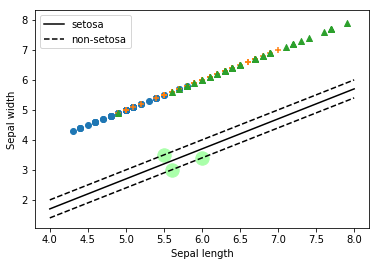

In [13]:
plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#AAFFAA')
plt.plot(XX, decision_boundary, "k-")
plt.plot(XX, gutter_up, "k--")
plt.plot(XX, gutter_down, "k--")

markers = ['o','+','^']
for i in range(3):
  xs = X[:,0][y == i]
  ys = X[:,0][y == i]
  plt.scatter(xs, ys, marker=markers[i])
bibary_names = ['setosa','non-setosa']
plt.legend(bibary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")